# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Andrea Sala - Settembre 2020</span>
# <span style="color:darkgreen">  Esercitazione 2</span>

## Esercizio 2.1
 Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

Per risolvere gli integrali con metodi Monte Carlo, si considera la funzione integranda come prodotto tra una distribuzione di probabilità $p(x)$ (su cui è quindi necessario richiedere la non-negatività) e una funzione $g(x)$. Estraendo un set $x_i$ di numeri distribuiti secondo $p(x)$, la quantità $G_N = \sum_{i=1}^N g(x_i)$ è uno stimatore dell'integrale $I=\int_0^1 p(x)g(x)$

 Questo metodo può essere usato scegliendo una qualsiasi $p(x)$ distribuzione di probabilità, ma è intuitivo capire che se $p(x)$ è simile alla funzione integranda (ovvero $g(x)\simeq 1$) il calcolo numerico dell'integrale risulta molto più efficiente e si va a ridurre l'errore commesso. Infatti come errore statistico sull'integrale si usa la varianza $\sigma^2 = \langle g^2\rangle _p - \langle g \rangle _p ^2$

Ho simulato $M=10^5$ misure divise in $N=100$ blocchi. I risultati ottenuti nel caso di campionamento di distribuzione uniforme sono i seguenti:

In [36]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import optimize


M = 100000
N = 100
L= int(M/N)
x=np.arange(N)

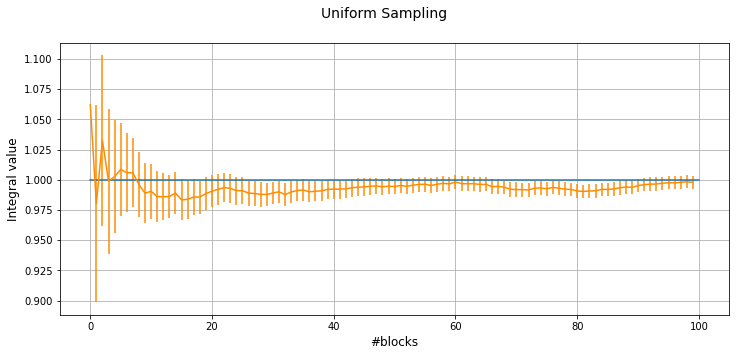

Final value of I: 0.997939    error:  0.00528403


In [29]:
r, err = np.loadtxt("2.1_AS/results.out",usecols=(0,1), delimiter=', ', unpack='true')
plt.figure(figsize=(12,5))
plt.errorbar(x,r,xerr=None,yerr=err, color='darkorange')
plt.plot([0,N],[1,1])
plt.suptitle("Uniform Sampling", fontsize=14)
plt.xlabel('#blocks', fontsize=12)
plt.ylabel('Integral value', fontsize=12)
plt.grid(True)
plt.show()

print("Final value of I:", r[N-1], "   error: ", err[N-1])


L'*Importance Sampling* consiste nello scegliere come $p^*(x)$ una funzione che approssima bene l'integranda, e questo può essere fatto anche se $p^*(x)$ non è esplicitamente contenuta nella funzione integranda:

 $$\int f(x) dx = \int \biggl[ \frac{f(x)}{p^*(x)}\biggr]p^*(x)dx\ , $$ con $p^*(x)$ normalizzata e non negativa sull'intervallo di integrazione.

Una buona scelta di $p^*(x)$ è lo sviluppo in serie di Taylor al terzo ordine della funzione $f(x)=\frac{\pi}{2}\cos(\pi x/2)$, diviso per una costante di normalizzazione ricavata analiticamente. Con qualche calcolo si ottiene $$p^*(x) = (1 - \frac{\pi^2 x^2}{8} + \frac{\pi^4 x^4}{384})\big/(1 - \frac{\pi^2}{8} + \frac{\pi^4}{384})\  $$
È stato necessario sviluppare fino al terzo ordine perchè lo sviluppo al secondo ordine del coseno approssima la funzione 'dal basso', e quindi sarebbe stato negativo. Ricordando che lo sviluppo di Taylor in questo caso sta svolgendo il ruolo di una distribuzione di porbabilità, si capisce subito perchè non posso troncare al secondo ordine lo sviluppo. Non essendo una distribuzione inveritbile, per campionare questa distribuzione polinomiale ho utilizzato un metodo di *accept/reject*. I risultati ottenuti con questo campionamenti sono riportati di seguito.

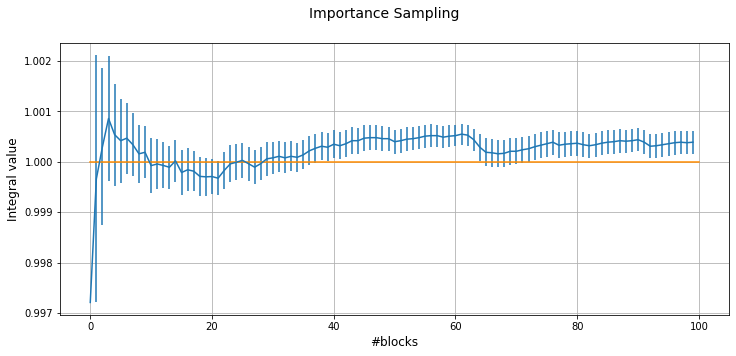

Final value of I: 1.00039    error:  0.000228101


In [30]:
r, err = np.loadtxt("2.1_AS/importance.out",usecols=(0,1), delimiter=', ', unpack='true')
plt.figure(figsize=(12,5))
plt.errorbar(x,r,xerr=None,yerr=err)
plt.plot([0,N],[1,1], color='darkorange')
plt.suptitle("Importance Sampling", fontsize=14)
plt.xlabel('#blocks', fontsize=12)
plt.ylabel('Integral value', fontsize=12)
plt.grid(True)
plt.show()

print("Final value of I:", r[N-1], "   error: ", err[N-1])



 La stima dell'integrale in questo caso è accettabile entro $2\sigma$. Ho scelto di stampare in output il valore dell'integrale e dell'errore in entrambi i casi per far vedere come l'*Importance Sampling* garantisca un errore 20 volte più piccolo rispetto all'*Uniform Sampling*.

## Esercizio 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

Ho simulato dapprima la RW in un reticolo di passo $a=1$. Il codice esegue $M=10^4$ simulazioni di $N$ passi ciascuna ($N = 1,2,\dots,100$), dove il passo viene eseguito in una qualsiasi delle tre direzioni e in un verso qualsiasi (con uguale probabilità). Usando come al solito la tecnica del data blocking ho accumulato la quantità $r^2$ mediandola su tutti i blocchi e dopo averla mediata ne ho estratto la radice quadrata.

  Per la RW nel continuo invece, ho seguito lo stesso procedimento modificando solo la funzione Passo: ad ogni step, il codice esegue un campionamento dell'angolo solido. Va ricordato che questo **non** significa estrarre $\theta \in [0,\pi]$ uniformemente ma piuttosto $\theta= \arccos(1-2b) \mbox{ con }b \in [0,1]$ uniforme. L'angolo $\varphi$ può invece essere estratto in modo uniforme dall'intervallo $[0,2\pi]$. La simulazione dunque esegue un passo di modulo 1 in una direzione casuale.

Infine è stato realizzato, come suggerito, un fit con una legge di potenza del tipo $f(N) = k \sqrt{N}$. I parametri del fit sono riportati sotto i grafici. Un tale andamento mostra un andamento diffusivo della particella all'aumentare del numero $N$ di passi.

3D lattice fit parameter: k = [1.00294711]
Continuum fit parameter: k = [0.9946739]


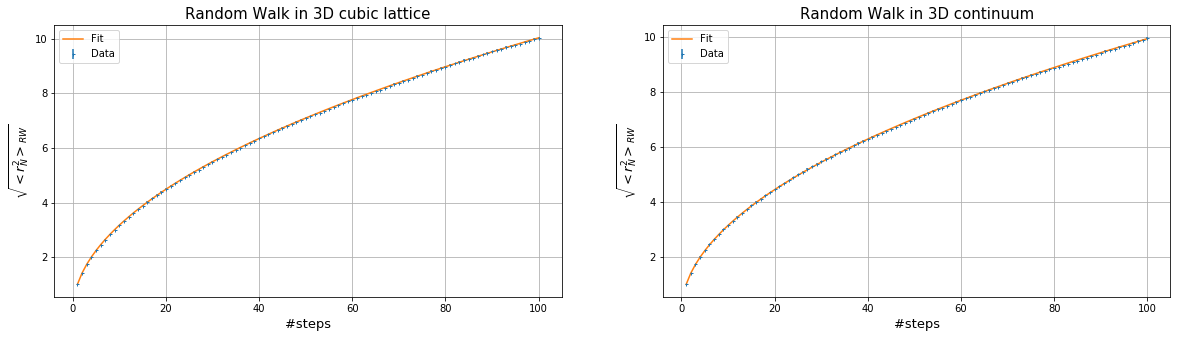

In [39]:
def fit_function(x, a):
    return a * np.sqrt(x)

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

(step, R, errR) = np.loadtxt('2.2_AS/lattice.out', unpack=True, usecols=(0, 1, 2), delimiter=', ')
params = optimize.curve_fit(fit_function, step, R)
axs[0].set_title('Random Walk in 3D cubic lattice', fontsize=15)
axs[0].errorbar(step, R, yerr=errR, linestyle = " ", marker="+", label ='Data', markersize=3)
axs[0].plot(step, fit_function(step, params[0]), label='Fit')
print('3D lattice fit parameter: k =', params[0])

(step, R, errR) = np.loadtxt('2.2_AS/continuum.out', unpack=True, usecols=(0, 1, 2), delimiter=', ')
params = optimize.curve_fit(fit_function, step, R)
axs[1].set_title('Random Walk in 3D continuum', fontsize=15)
axs[1].errorbar(step, R, yerr=errR, linestyle = " ", marker="+", label ='Data', markersize=6)
axs[1].plot(step, fit_function(step, params[0]), label='Fit')
print('Continuum fit parameter: k =', params[0])

for ax in axs.flat:
    ax.set_xlabel('#steps', fontsize=13)
    ax.set_ylabel('$\sqrt{<r_N^2>_{RW}}$', fontsize=13)
    ax.legend(loc='best', fontsize='medium')
    ax.grid(True)

I parametri del fit risultano in entrambi i casi pari a 1, che è esattamente la lunghezza (in modulo) del passo $a$.